In [76]:
import pandas as pd 
import numpy as np

## Check the encoding of the file

In [77]:
with open('Elon_musk.csv') as f:
    print(f)

<_io.TextIOWrapper name='Elon_musk.csv' mode='r' encoding='cp1252'>


## Load and check the data

In [78]:
data = pd.read_csv('Elon_musk.csv',encoding='cp1252',index_col=0)
data.head()

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [79]:
data.shape

(1999, 1)

In [80]:
data['Text'][1998]

'@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>'

In [81]:
data['Text'][512]

"RT @NASA: Success! At 1:40pm ET, @SpaceX's upgraded Dragon cargo spacecraft autonomously docked to the @Space_Station. \n\n<U+0001F409> This is the 1st…"

## EDA

In [82]:
# Number of words
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))  
# Number of characters
data['char_count'] = data['Text'].str.len()  
# Number of stopwords
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
# Number of special numerics
data['number'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
# Number of uppercase words
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
# Number of links 
data['link'] = data['Text'].str.contains('https://').value_counts()
# Number of user tags
data['num_tag'] = data['Text'].str.contains('@').value_counts()

In [83]:
data.head()

,Text,word_count,char_count,stopwords,number,upper,link,num_tag
1,@kunalb11 I’m an alien,4,22,1,0,0,NaN,NaN
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,4,0,1,NaN,NaN
3,@joerogan @Spotify Great interview!,4,35,0,0,0,NaN,NaN
4,@gtera27 Doge is underestimated,4,31,1,0,0,NaN,NaN
5,@teslacn Congratulations Tesla China for amazi...,17,104,5,0,0,NaN,NaN


Spelling correction

In [84]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [85]:
from textblob import TextBlob
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

1                               @kunalb11 I’m an alien
2    @ID_AA_Carmack May tracing on Cyberpunk with H...
3                   @joerogan @Notify Great interview!
4                       @gtera27 One is underestimated
5    @teslacn Congratulations Cela China for amazin...
Name: Text, dtype: object

## Data Visualization

[Text(0, 0, 'SpaceX'),
 Text(1, 0, 'Erdayastronaut'),
 Text(2, 0, 'PPathole'),
 Text(3, 0, 'flcnhvy'),
 Text(4, 0, 'Tesla'),
 Text(5, 0, 'WholeMarsBlog'),
 Text(6, 0, 'teslaownersSV'),
 Text(7, 0, 'Teslarati'),
 Text(8, 0, 'NASASpaceflight'),
 Text(9, 0, 'cleantechnica'),
 Text(10, 0, 'Kristennetten'),
 Text(11, 0, 'RationalEtienne'),
 Text(12, 0, 'MarcusHouseGame'),
 Text(13, 0, 'ID_AA_Carmack'),
 Text(14, 0, 'engineers_feed'),
 Text(15, 0, 'ErcXspace'),
 Text(16, 0, 'EvaFoxU'),
 Text(17, 0, 'NASA'),
 Text(18, 0, 'ajtourville'),
 Text(19, 0, 'lexfridman')]

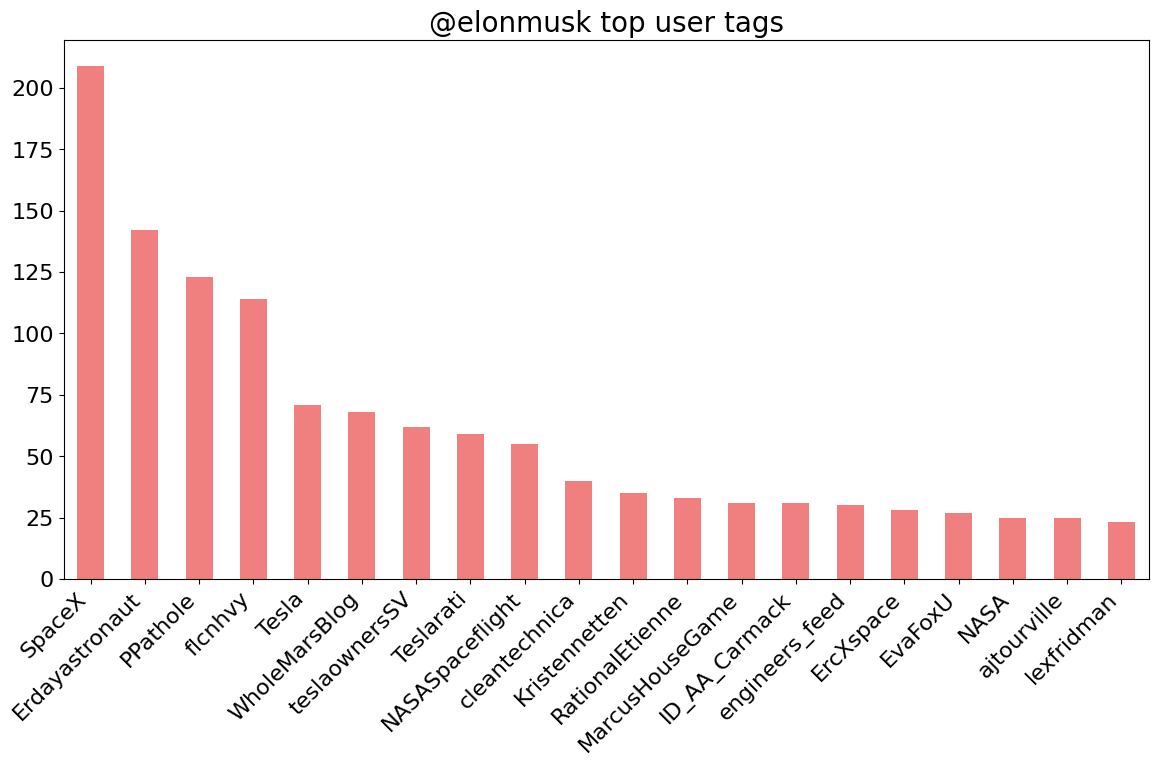

In [86]:
import itertools
fun = lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") if '@' in handle.replace(":", "")]
c = list(itertools.chain(*data['Text'].map(fun).tolist()))
pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)


## Text pre Processing

In [87]:
import re
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text 

In [88]:
# Removing '@username'
data['Tweets'] = np.vectorize(remove_pattern)(data['Text'], "@[\w]*")
data.head()

,Text,word_count,char_count,stopwords,number,upper,link,num_tag,Tweets
1,@kunalb11 I’m an alien,4,22,1,0,0,NaN,NaN,I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,4,0,1,NaN,NaN,Ray tracing on Cyberpunk with HDR is next-lev...
3,@joerogan @Spotify Great interview!,4,35,0,0,0,NaN,NaN,Great interview!
4,@gtera27 Doge is underestimated,4,31,1,0,0,NaN,NaN,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,17,104,5,0,0,NaN,NaN,Congratulations Tesla China for amazing execu...


In [89]:
# removing links
tweets = []
for index, row in data.iterrows():
    words_without_links = [word for word in row.Tweets.split() if 'http' not in word]
    tweets.append(' '.join(words_without_links))

data['Tweets'] = tweets
data.head()

,Text,word_count,char_count,stopwords,number,upper,link,num_tag,Tweets
1,@kunalb11 I’m an alien,4,22,1,0,0,NaN,NaN,I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,4,0,1,NaN,NaN,Ray tracing on Cyberpunk with HDR is next-leve...
3,@joerogan @Spotify Great interview!,4,35,0,0,0,NaN,NaN,Great interview!
4,@gtera27 Doge is underestimated,4,31,1,0,0,NaN,NaN,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,17,104,5,0,0,NaN,NaN,Congratulations Tesla China for amazing execut...


In [90]:
# Remove empty text tweets
data = data[data['Tweets']!='']

In [91]:
# Drop duplicate rows
data.drop_duplicates(subset=['Tweets'], keep=False)

,Text,word_count,char_count,stopwords,number,upper,link,num_tag,Tweets
1,@kunalb11 I’m an alien,4,22,1,0,0,NaN,NaN,I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,4,0,1,NaN,NaN,Ray tracing on Cyberpunk with HDR is next-leve...
3,@joerogan @Spotify Great interview!,4,35,0,0,0,NaN,NaN,Great interview!
4,@gtera27 Doge is underestimated,4,31,1,0,0,NaN,NaN,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,17,104,5,0,0,NaN,NaN,Congratulations Tesla China for amazing execut...
...,...,...,...,...,...,...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",23,144,10,0,0,NaN,NaN,"True, it sounds so surreal, but the negative p..."
1996,@PPathole Make sure to read ur terms &amp; con...,12,77,2,0,0,NaN,NaN,Make sure to read ur terms &amp; conditions be...
1997,@TeslaGong @PPathole Samwise Gamgee,4,35,0,0,0,NaN,NaN,Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,7,59,2,0,1,NaN,NaN,Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [92]:
# removing punctuation, numbers and special characters
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Remove emoticons
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [93]:
data['Tweets'] = data['Tweets'].apply(lambda x: clean_text(x))
data['Tweets'] = data['Tweets'].apply(lambda x: remove_emoji(x))

In [94]:
# resetting index
data = data.reset_index(drop=True)
data.head()

,Text,word_count,char_count,stopwords,number,upper,link,num_tag,Tweets
0,@kunalb11 I’m an alien,4,22,1,0,0,NaN,NaN,i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,4,0,1,NaN,NaN,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,NaN,NaN,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,NaN,NaN,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,5,0,0,NaN,NaN,congratulations tesla china for amazing execut...


In [ ]:
#with open('stop.txt') as f:
    #extra_stop = [word.strip('\n') for word in f.readlines()]

In [95]:
# Removing stop words
from nltk.corpus import stopwords
StopWords=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
StopWords.extend(sw_list)
stopwords_set = set(StopWords)
cleaned_tweets = []

for index, row in data.iterrows():
    words_without_stopwords = [word for word in row.Tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
data['Tweets'] = cleaned_tweets

In [96]:
# Tokenize Tweets
tokenized_tweet = data['Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                              [alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
Name: Tweets, dtype: object

In [97]:
# converting words to lemma 
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                              [alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
Name: Tweets, dtype: object

In [98]:
# Joining all tokens into sentences
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

data['Tweets'] = tokenized_tweet
data.head(10)

,Text,word_count,char_count,stopwords,number,upper,link,num_tag,Tweets
0,@kunalb11 I’m an alien,4,22,1,0,0,NaN,NaN,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,4,0,1,NaN,NaN,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,4,35,0,0,0,NaN,NaN,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,NaN,NaN,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,5,0,0,NaN,NaN,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,NaN,NaN,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,5,0,0,NaN,NaN,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,0,0,0,NaN,NaN,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,2,0,0,NaN,NaN,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,8,48,4,0,0,NaN,NaN,entertaining outcome likely


In [101]:
Tweet_data = data.iloc[:,[0,8]]
Tweet_data.head()

,Text,Tweets
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...


## Feature Extraction for key words

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(Tweet_data['Tweets'])

## Fetch sentiments

In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# using NLTK's SentimentIntensityAnalyzer 
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

sentiments_using_SIA = Tweet_data['Tweets'].apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Tweets
pos,1751
neg,200


In [112]:
sid = SentimentIntensityAnalyzer()

In [122]:
df['compound'].values

array([ 0.    ,  0.    ,  0.6249, ...,  0.    , -0.7003,  0.4215])

In [124]:

sentiment = []
for c in (df['compound'].values):
    if c >= 0.05:
        sentiment.append('positive')
    elif c <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

sentiment


['neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 '

In [125]:
df=pd.DataFrame()
df['Tweets'] = Tweet_data['Tweets']
df['scores'] = Tweet_data['Tweets'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df['sentiment'] = sentiment 
df.head()

,Tweets,scores,compound,sentiment
0,alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive
3,doge underestimated,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,negative
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,positive


In [129]:
df['sentiment'].value_counts()

neutral     923
positive    832
negative    196
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

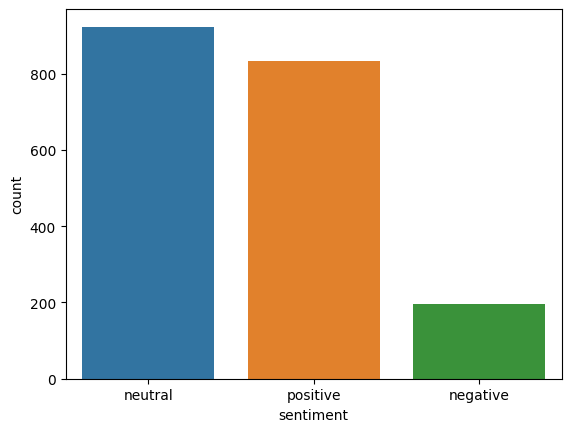

In [131]:
import seaborn as sns
sns.countplot(data=df,x='sentiment')

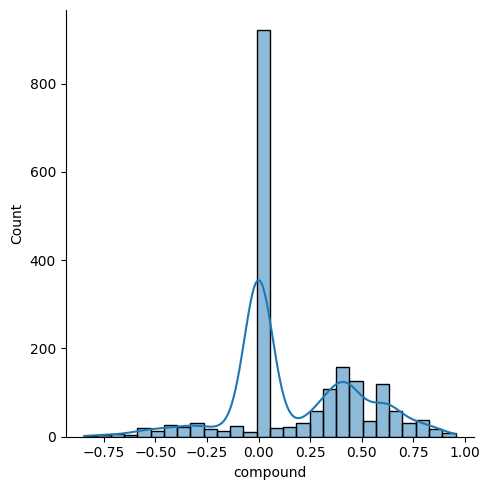

In [134]:
sns.displot(df['compound'],kde=True)

### Most common words in positive tweets

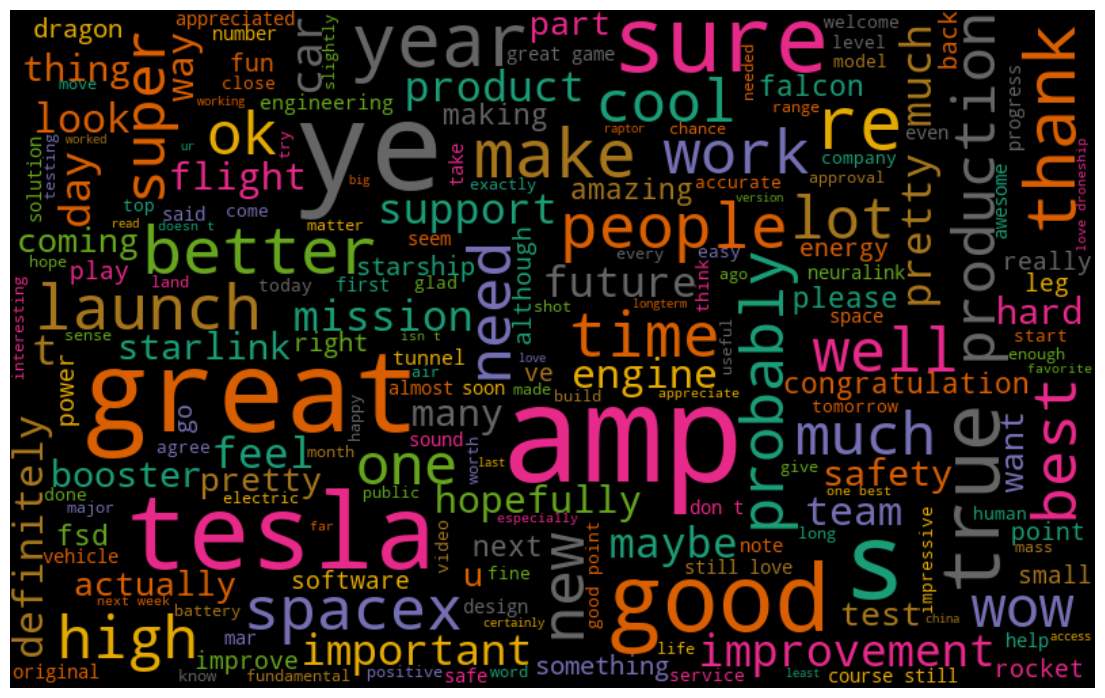

In [136]:
from wordcloud import WordCloud
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

all_words = ' '.join([text for text in df['Tweets'][df['sentiment'] == 'positive']])
generate_wordcloud(all_words)

### Most common words in negative tweet

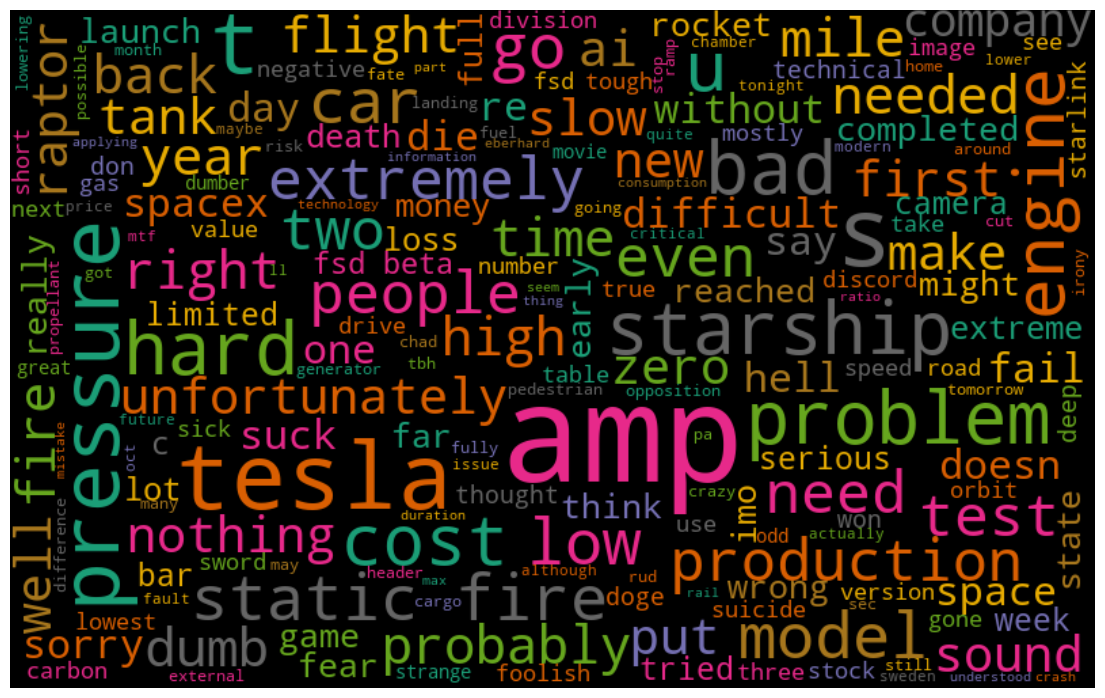

In [137]:
all_words = ' '.join([text for text in df['Tweets'][df['sentiment'] == 'negative']])
generate_wordcloud(all_words)

## Model building : Sentiment Analysis

In [149]:
target_variable = df['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [150]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

## prediction on 'key words' based featurs

Accuracy Score - 0.6126279863481229


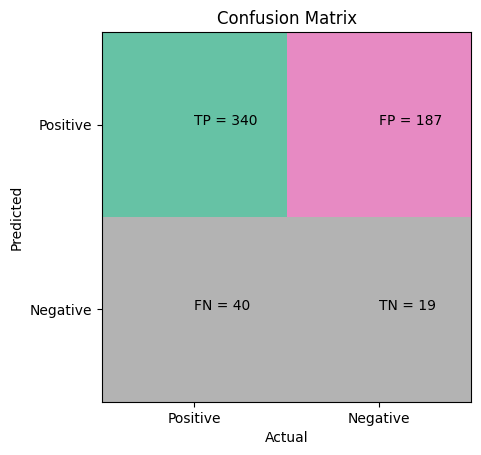

In [151]:

# TF - IDF word features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)